KMEANS

In [37]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [38]:
from sklearn.datasets import make_blobs 

In [39]:
x,y = make_blobs(n_samples=1000 , centers=3 , n_features= 2 )

In [40]:
y

array([2, 1, 1, 2, 0, 1, 0, 2, 0, 0, 1, 2, 0, 0, 2, 1, 1, 1, 0, 2, 0, 0,
       2, 1, 0, 1, 0, 1, 2, 2, 0, 2, 0, 2, 0, 1, 1, 1, 0, 1, 2, 0, 2, 2,
       2, 0, 1, 1, 1, 0, 0, 1, 2, 1, 2, 0, 0, 1, 2, 1, 0, 1, 0, 1, 1, 1,
       1, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 1, 2, 1, 1, 0, 1, 2, 0, 2, 1,
       0, 2, 1, 0, 1, 2, 2, 0, 2, 0, 1, 2, 0, 2, 1, 1, 2, 2, 0, 2, 0, 0,
       0, 1, 1, 1, 0, 0, 2, 1, 2, 1, 1, 0, 0, 0, 2, 1, 0, 0, 1, 1, 2, 0,
       0, 2, 2, 1, 1, 1, 2, 0, 0, 1, 0, 2, 1, 2, 1, 1, 0, 1, 2, 0, 0, 0,
       1, 1, 2, 0, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 0, 1, 1,
       1, 1, 2, 1, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 1, 0, 0, 2, 1, 0,
       0, 1, 2, 2, 2, 0, 2, 2, 1, 0, 0, 2, 2, 2, 1, 0, 1, 1, 1, 0, 2, 1,
       0, 1, 1, 0, 1, 1, 0, 2, 1, 0, 2, 0, 1, 1, 1, 0, 1, 2, 2, 1, 1, 0,
       0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 2, 1, 1, 2, 1, 0, 1, 0, 1, 2, 2, 0,
       0, 1, 1, 1, 1, 2, 2, 2, 1, 0, 2, 1, 1, 0, 1, 0, 2, 1, 1, 0, 0, 1,
       2, 1, 1, 1, 2, 1, 2, 2, 0, 2, 1, 2, 1, 2, 1,

In [41]:
x # Feature 1 and Feature 2 
# We Will cluster this data on into groups as given above 3 
# In Real we dont knoe how many Groups We actually need so we fo validation techniques 'Silhoutte' 

array([[-1.72136201,  1.1645923 ],
       [-3.02380881, -0.36163586],
       [-2.54543184,  1.40381256],
       ...,
       [-6.57699784,  2.26457662],
       [-2.28148043,  2.34065107],
       [-2.25229052, -1.58401746]])

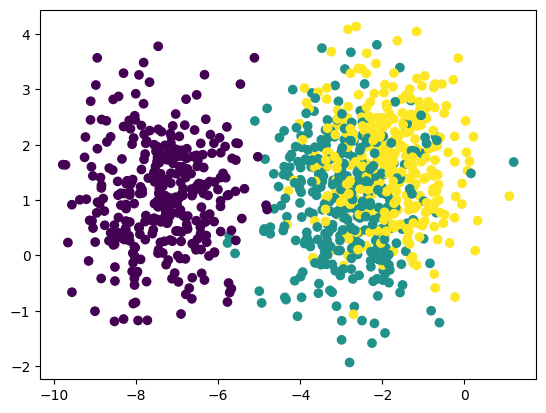

In [42]:
#Plotting the Group coordinates of X Data  

plt.scatter(x[:,0] ,x[:,1] , c=y )

In [43]:
# Standardization Technique 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [44]:
from sklearn.model_selection import train_test_split 

x_train , x_test ,y_train , y_test = train_test_split( x, y, test_size= 0.33 , random_state=42)

In [45]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [46]:
from sklearn.cluster import KMeans 

In [47]:
#   ELBOW METHOD TO SELECT K Values 
wcss = []
for k in range (1,11):
    kmeans = KMeans(n_clusters=k , init="k-means++")
    kmeans.fit(x_train_scaled)
    wcss.append(kmeans.inertia_)

In [48]:
wcss

[1339.9999999999986,
 765.0456076566213,
 449.8878968634343,
 335.1973324618789,
 264.4763222456004,
 230.6807041325523,
 197.2778185368266,
 175.89690064957782,
 160.50784872143595,
 150.23836123076237]

Text(0, 0.5, 'Wcss')

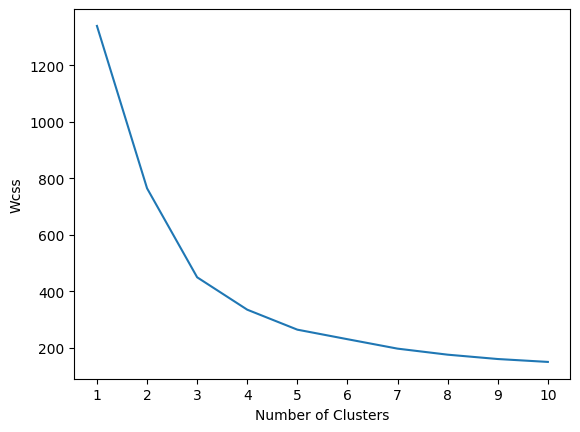

In [49]:
# To see what is Our K values Let's PLot it 
plt.plot(range(1,11) , wcss )
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Wcss")

# It beacome Stable at K = 3

In [50]:
kmeans = KMeans(n_clusters=3 , init="k-means++")


In [51]:

kmeans.fit_predict(x_train_scaled)

array([1, 1, 0, 1, 2, 0, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 1, 2, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 1, 0, 2, 0, 1, 1, 0, 2, 0, 1, 1,
       1, 2, 1, 1, 0, 0, 0, 2, 2, 0, 1, 0, 1, 1, 2, 0, 2, 1, 2, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 2, 2, 1, 0, 0, 2, 1, 2, 0, 1, 0, 2, 0, 1,
       0, 1, 1, 1, 0, 1, 2, 1, 2, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 2,
       1, 2, 0, 2, 1, 2, 1, 2, 0, 2, 2, 2, 1, 2, 1, 2, 2, 0, 0, 1, 1, 2,
       0, 2, 2, 0, 1, 1, 1, 2, 0, 0, 2, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 2,
       1, 2, 0, 1, 0, 0, 2, 1, 2, 1, 1, 2, 0, 0, 1, 0, 2, 2, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 2, 2, 0, 2, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1,
       2, 0, 0, 1, 1, 1, 2, 0, 1, 0, 1, 2, 0, 0, 2, 1, 0, 2, 1, 0, 1, 1,
       0, 1, 0, 2, 2, 0, 0, 2, 2, 1, 0, 2, 0, 1, 1, 1, 2, 0, 1, 0, 0, 2,
       2, 1, 1, 0, 1, 2, 2, 2, 1, 0, 2, 2, 0, 2, 1, 0, 1, 2, 1, 2, 2, 2,
       2, 2, 0, 1, 1, 0, 1, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 1, 0, 2, 0, 1,
       2, 2, 0, 1, 0, 1, 0, 2, 2, 0, 2, 1, 0, 1, 1,

In [52]:
y_pred = kmeans.predict(x_test_scaled)

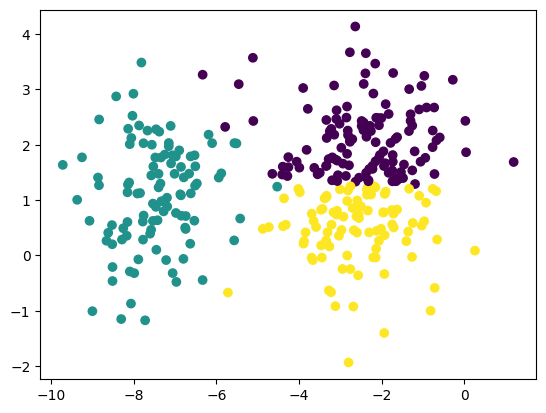

In [53]:
plt.scatter(x_test[:,0] ,x_test[:,1]  ,c=y_pred ) 

Validating the K Values 

In [54]:
# KneeLocator 
from kneed import KneeLocator

In [58]:
kl = KneeLocator(range(1,11) , wcss , curve = "convex" , direction="decreasing")

In [60]:
kl.elbow # Gives K Value 

np.int64(3)

In [61]:
# Silhoute Scoring 
from sklearn.metrics import silhouette_score

In [63]:
silhouette_coeffecients  = []
for k in range(2,11) : 
    kmeans =KMeans(n_clusters = k , init = "k-means++")
    kmeans.fit(x_train_scaled)
    score = silhouette_score(x_train_scaled,kmeans.labels_)
    silhouette_coeffecients.append(score) 

In [64]:
silhouette_coeffecients

[np.float64(0.4396275547884764),
 np.float64(0.4494989161455613),
 np.float64(0.3836485101357412),
 np.float64(0.41034730316122103),
 np.float64(0.363791603691542),
 np.float64(0.3498527745375622),
 np.float64(0.3281919399733143),
 np.float64(0.331619440058212),
 np.float64(0.3312590593937105)]

Text(0, 0.5, 'silhouette coeffecients ')

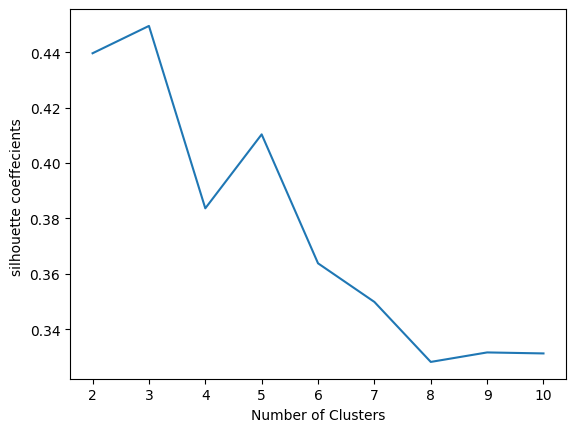

In [65]:
plt.plot(range(2,11) , silhouette_coeffecients  )
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette coeffecients ")
# Where the silhpttoe score is higher that will be our K value 